In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler

In [3]:
# Read the train and test data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
# Include final weight attribute
final_weight_train = train["Final Weight"]
# Exclude final weight attribute
x_train = train.drop(columns = ['Income', 'Final Weight'])
y_train = train['Income']
# Include final weight attribute
final_weight_test = test["Final Weight"]
# Exclude final weight attribute
x_test = test.drop(columns =['Income', 'Final Weight'])
y_test = test['Income']

<h1>Neural Networks:</h1>

<h5>Data Preprocessing</h5>

In [4]:
# Standerdized the data since neural network is sensitive to feature scaling
stds = StandardScaler()
stds.fit(x_train)
x_train = stds.transform(x_train)
x_test = stds.transform(x_test)

<h5>Traning on a relative complex network</h5>

Created an instance of the Multilayer perceptron (MLP) artificial nerual network with 4 layers with 100 neurons in each layer

hidden_layer_sizes: (100, 100, 100, 100)  # one hidden layer with 400 neurons  
activation: "tanh"  # hidden layer activation function   
solver: "adam"  # weight optimization method (adam is a stochastic gradient descent optimizer)  
batch_size: 200 # batch sizde for minibatch gradient descent  
learning_rate_init: 0.001 # initial learning rate  
learning_rate: "constant" # constant 0.001  
max_iter: 200 # Maximum num of epochs
momentum :0.9 # Momentum for gradient descent update  
alpha: "0.0001"  # for regularization    

In [5]:
complex_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100), activation="tanh", max_iter=400)

Train the model using training set

In [6]:
complex_mlp.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100, 100),
              max_iter=400)

Plot the loss curve

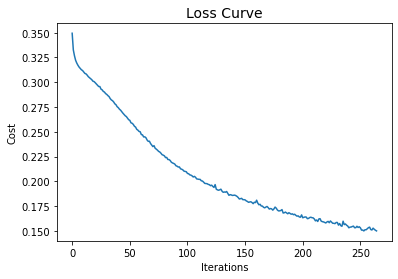

In [7]:
plt.plot(complex_mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [8]:
# Activation function for output layer
complex_mlp.out_activation_

'logistic'

In [9]:
# Activation function for hidden layers
complex_mlp.activation

'tanh'

Make prediction on the training set

In [10]:
y_pred_train = complex_mlp.predict(x_train)

Showing the confusion matrix for the results of training set

C:\environment\Anaconda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


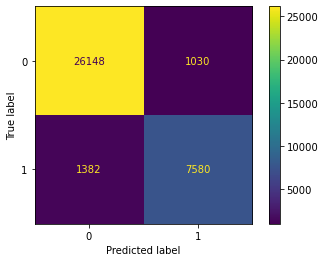

In [11]:
plot_confusion_matrix(complex_mlp, x_train, y_train)
plt.show()

In [12]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     27178
           1       0.88      0.85      0.86      8962

    accuracy                           0.93     36140
   macro avg       0.92      0.90      0.91     36140
weighted avg       0.93      0.93      0.93     36140



<h5>Verify the complex MLP model on the test set</h5>

In [13]:
y_pred_test = complex_mlp.predict(x_test)

C:\environment\Anaconda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


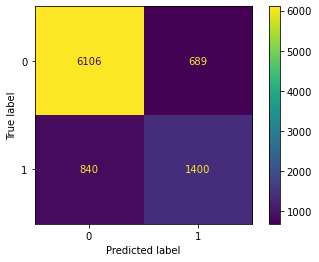

In [14]:
plot_confusion_matrix(complex_mlp, x_test, y_test)

plt.show()

In [16]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6795
           1       0.67      0.62      0.65      2240

    accuracy                           0.83      9035
   macro avg       0.77      0.76      0.77      9035
weighted avg       0.83      0.83      0.83      9035



The dataset is highly unbanlanced. We care more about the performance on the minority class which is 1. The precision, recall, f1 score are all dropped significantly indicating strong overfitting. 

<h3>Hyper Parameter Tuning</h3>

In [71]:
# optimal number of layers for simple problem -- 1 layer
# optimal neuron in each layer: 2/3*(size of input layer) + size of output layer = 19 or 20; so ranging from 16-25
# As the input feature is decresing 
param_grid = {
    "hidden_layer_sizes": [(16),(17),(18),(19),(20),(21),(22),(23),(24),(25)],
    "activation": ["tanh", "relu", "logistic"],
    "solver": ["sgd", "adam"],
    "alpha":[0.1, 0.01, 0.001, 0.0001],
    "learning_rate_init": np.arange(0.01, 0.1, 0.02)
}
# batch_size = 200 by default
# 10 * 3 * 2 * 4 * 5  = 1200

In [72]:
mlp = MLPClassifier()

In [73]:
# Five fold cross validation to find out the best set of parameters
# try to maximize the f1-score on the positve class when doing 5-fold cross validation
f1 = make_scorer(f1_score , average='binary', pos_label = 1)
rs_cv = RandomizedSearchCV(mlp, param_grid, verbose=10, n_jobs=-1, cv=5, n_iter=200, scoring=f1)

In [74]:
rs_cv.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': [0.1, 0.01, 0.001, 0.0001],
                                        'hidden_layer_sizes': [16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25],
                                        'learning_rate_init': array([0.01, 0.03, 0.05, 0.07, 0.09]),
                                        'solver': ['sgd', 'adam']},
                   scoring=make_scorer(f1_score, average=binary, pos_label=1),
                   verbose=10)

In [75]:
rs_cv.best_params_

{'solver': 'sgd',
 'learning_rate_init': 0.08999999999999998,
 'hidden_layer_sizes': 23,
 'alpha': 0.1,
 'activation': 'relu'}

In [76]:
# cv results
cv_results = pd.DataFrame(rs_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.545925,0.485200,0.00924,7.297930e-04,adam,0.09,23,0.0001,tanh,"{'solver': 'adam', 'learning_rate_init': 0.089...",0.600489,0.668643,0.655532,0.535918,0.666667,0.625450,0.051202,198
1,7.244996,1.509577,0.00594,2.197743e-04,sgd,0.01,19,0.1,relu,"{'solver': 'sgd', 'learning_rate_init': 0.01, ...",0.676737,0.652390,0.654332,0.653509,0.670762,0.661546,0.010160,122
2,8.131265,1.292005,0.00583,4.399778e-04,sgd,0.03,23,0.001,relu,"{'solver': 'sgd', 'learning_rate_init': 0.03, ...",0.673177,0.654867,0.655970,0.663203,0.663272,0.662098,0.006560,117
3,8.779959,1.229502,0.00605,1.784161e-07,adam,0.01,19,0.0001,logistic,"{'solver': 'adam', 'learning_rate_init': 0.01,...",0.680272,0.650227,0.652228,0.658831,0.673244,0.662960,0.011831,104
4,3.032478,0.692424,0.00847,5.608684e-04,adam,0.05,22,0.001,tanh,"{'solver': 'adam', 'learning_rate_init': 0.049...",0.681042,0.617745,0.633900,0.653126,0.663766,0.649916,0.022192,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.395688,0.493581,0.00913,2.698099e-04,adam,0.07,22,0.001,tanh,"{'solver': 'adam', 'learning_rate_init': 0.069...",0.637897,0.622208,0.652530,0.664464,0.655395,0.646499,0.014848,187
196,11.569754,1.053698,0.00704,1.451022e-03,sgd,0.01,17,0.0001,tanh,"{'solver': 'sgd', 'learning_rate_init': 0.01, ...",0.670177,0.660302,0.664055,0.659341,0.670545,0.664884,0.004743,69
197,1.990551,0.509788,0.00550,3.479461e-04,adam,0.09,22,0.01,relu,"{'solver': 'adam', 'learning_rate_init': 0.089...",0.666873,0.613636,0.653650,0.615078,0.668874,0.643622,0.024465,191
198,7.655299,0.724145,0.00385,2.780415e-07,sgd,0.03,25,0.01,relu,"{'solver': 'sgd', 'learning_rate_init': 0.03, ...",0.678219,0.663268,0.654188,0.653652,0.674137,0.664693,0.010064,72


In [77]:
# printing the optimal accuracy score and hyperparameters
print("Best F-1 Score: ", rs_cv.best_score_)
print("It was achieved using the following hyper-parameters: ")
print(rs_cv.best_params_)

Best F-1 Score:  0.6753326703454647
It was achieved using the following hyper-parameters: 
{'solver': 'sgd', 'learning_rate_init': 0.08999999999999998, 'hidden_layer_sizes': 23, 'alpha': 0.1, 'activation': 'relu'}


<h3>Creating a model using the best hyper-parameters: <h3>

In [78]:
mlp_tuned = MLPClassifier(hidden_layer_sizes=(23)  ,solver='sgd', learning_rate_init=0.09, alpha=0.1, activation='relu')

In [79]:
mlp_tuned.fit(x_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=23, learning_rate_init=0.09,
              solver='sgd')

see the result on the train set

In [83]:
y_pred_train = mlp_tuned.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     27178
           1       0.74      0.63      0.68      8962

    accuracy                           0.85     36140
   macro avg       0.81      0.78      0.79     36140
weighted avg       0.85      0.85      0.85     36140



See the result on the test set

In [84]:
y_pred_test = mlp_tuned.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6795
           1       0.75      0.64      0.69      2240

    accuracy                           0.86      9035
   macro avg       0.82      0.78      0.80      9035
weighted avg       0.85      0.86      0.85      9035



Both test set and train set shows similar results, with the test set performing slightly better thus indicating that there is no overfitting.

Plot the confusion matrix on the test set 

C:\environment\Anaconda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


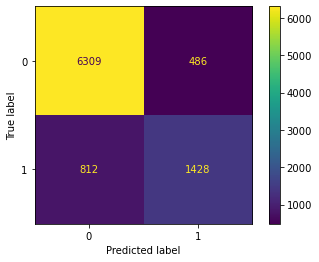

In [85]:
plot_confusion_matrix(mlp_tuned, x_test, y_test)
plt.show()

Plot the loss curve

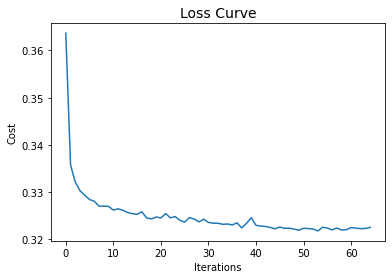

In [86]:
plt.plot(mlp_tuned.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Taking final weight of each row into account and calculate the precision, recall and f1 score of the minority class

In [87]:
#precision = true_positive / (true_positive + false_positive)
#Recall = true_positive / (true_positive + false_negative)
#f1= (2 * precision * recall) / (precision + recall)

def calculate_weighted_classification(final_weight, y_pred_income, y_actual):
    df = pd.DataFrame(final_weight)
    df["Predicted_Income"] = y_pred_income
    df["Actual_Income"] = y_actual
    true_positive = 0
    false_negatives = 0
    false_positive = 0
    for i in range(len(df)):
        actual_income = df.iloc[i]["Actual_Income"]
        predicted_income = df.iloc[i]["Predicted_Income"]
        final_weight = df.iloc[i]["Final Weight"]
        if actual_income == 1 and predicted_income == 1:
            true_positive += final_weight
        elif actual_income == 1 and predicted_income == 0:
            false_negatives += final_weight
        elif actual_income == 0 and predicted_income == 1:
            false_positive += final_weight
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negatives)
    f1= (2 * precision * recall) / (precision + recall)
    return precision, recall, f1

In [88]:
precision, recall, f1 = calculate_weighted_classification(final_weight_test, y_pred_test, y_test)
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")

Weighted Precision: 0.7579628641681798
Weighted Recall: 0.6417189072028622
Weighted F1 Score: 0.6950138393499392


Exporting the tuned model

In [92]:
# exports the trained mlp classifer model to file with file name "mlp.obj"
import pickle
mlp_model = open('mlp.obj', 'wb')
pickle.dump(mlp_tuned, mlp_model)